# Case2 : One dimensional exponential-like density example

In this notebook, we estimate exponential-like density on one-dimensional tree space by log-concave MLE. 

In [1]:
# importing packages
import lcdtreespace as lcd
import pandas as pd
import numpy as np
from importlib.resources import files
import os
import matplotlib.pyplot as plt

## sample data

We estimate following normal-like density on one-dimensional tree space:
$$f(x) \propto \begin{cases}\exp(-d(x,x_0)) & \text{if } x\in O_1\cap O_2 \text{ or } d(x,0) < 1 \\ 0 & \text{otherwise}\end{cases}$$
where $O_i$ denotes an orthant and $x_0$ is a point at an orthant $O_1$ that is one unit away from the origin.

Package lcdtreespace has sample data drawn from this density at ```files("lcdtreespace").joinpath("data", "case2")```. 

The file "testcase_{$n$}\_{$i$}\_X.npy" contain sample coordinates with sample size $n$. "testcase_{$n$}_{$i$}_ort.npy" contains the orthants that each point belongs to.

Here, we compute the log-concave MLE from "testcase_200_0" files.

In [2]:
# list of sample data available
np.sort(os.listdir(files("lcdtreespace").joinpath("data", "case2")))[:10]
# see full list with
#np.sort(os.listdir(files("lcdtreespace").joinpath("data", "case2")))

array(['testcase_1000_0_X.npy', 'testcase_1000_0_ort.npy',
       'testcase_1000_1_X.npy', 'testcase_1000_1_ort.npy',
       'testcase_1000_2_X.npy', 'testcase_1000_2_ort.npy',
       'testcase_1000_3_X.npy', 'testcase_1000_3_ort.npy',
       'testcase_1000_4_X.npy', 'testcase_1000_4_ort.npy'], dtype='<U23')

In [4]:
# load data
x = np.load(files("lcdtreespace").joinpath("data", "case2", "testcase_200_0_X.npy"))
ort = np.load(files("lcdtreespace").joinpath("data", "case2", "testcase_200_0_ort.npy"))
x[:10], ort[:10]
# x contains coordinates, while ort contains the orthant each point belongs to
true_density = lcd.exponential_1dim(mu=1,lam=1) # true density

## Computation of log-concave MLE

The computation of one dimensional log-concave MLE can be done by ```lcd.lcmle_1dim``` function. 

In [5]:
# optimization with BFGS is fast but unstable, thus we conduct 10 runs and adopt the best result
opt_y = lcd.lcmle_1dim(x=x,ort = ort,n_ort = 3, print_objective=True,bend=False,runs=10)

run 0: 2.6799557124129754
run 1: 2.655936073747655
run 2: 2.711960254099222
run 3: 2.760849550284148
run 4: 2.5854246429908256
run 5: 2.7177981134940103
run 6: 2.6469884450478256
run 7: 2.667805203116966
run 8: 2.637422130589088
run 9: 2.5840245511749154


In [6]:
# density object
lcmle = lcd.logconcave_density_estimate_1dim(opt_y, x, ort, 3, bend=False) # log-concave MLE
true_density = lcd.exponential_1dim(mu=1,lam=1) # true density

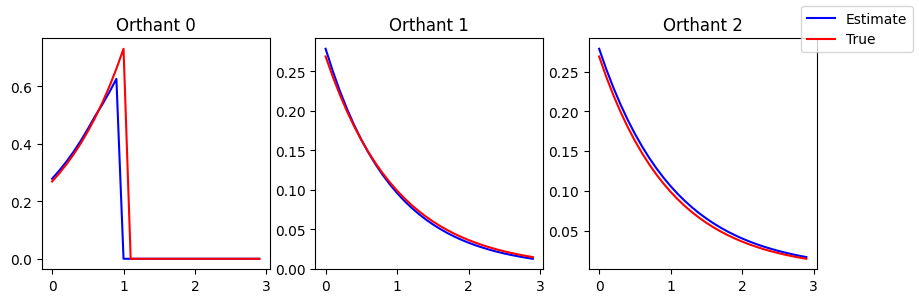

In [7]:
# plot of estimated density and true density
fig, axes = plt.subplots(1,3,figsize=(10,3))
xx = np.arange(0,3,0.1)
axes[0].plot(xx, np.vectorize(lcmle.pdf)(xx,0), c = "blue")
axes[0].plot(xx, np.vectorize(true_density.pdf)(xx,0), c = "red")
axes[0].set_title("Orthant 0")
axes[1].plot(xx, np.vectorize(lcmle.pdf)(xx,1), c = "blue")
axes[1].plot(xx, np.vectorize(true_density.pdf)(xx,1), c = "red")
axes[1].set_title("Orthant 1")
axes[2].plot(xx, np.vectorize(lcmle.pdf)(xx,2), c = "blue", label = "Estimate")
axes[2].plot(xx, np.vectorize(true_density.pdf)(xx,2), c = "red", label = "True")
axes[2].set_title("Orthant 2")
fig.legend()

## Kernel density estimator
To compare the result, we also compute the kernel density estimator from the same sample.

In [16]:
kde = lcd.kernel_density_estimate_1dim(x, ort, 3, bandwidth=0.11)

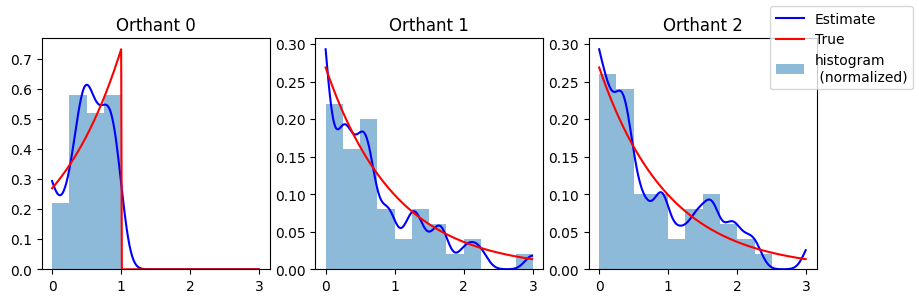

In [17]:
# plot of kernel density estimate and true_density
# Kernel density estimator
bin_edges = [k for k in np.arange(0,3.1,1/4)]
fig, axes = plt.subplots(1,3,figsize=(10,3))
xx = np.arange(0,3,0.01)
axes[0].plot(xx, np.vectorize(kde.pdf)(xx,0), c = "blue")
axes[0].plot(xx, np.vectorize(true_density.pdf)(xx,0), c = "red")
axes[0].hist(x[ort==0], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==0])) ] , alpha=0.5)
axes[0].set_title("Orthant 0")
axes[1].plot(xx, np.vectorize(kde.pdf)(xx,1), c = "blue")
axes[1].plot(xx, np.vectorize(true_density.pdf)(xx,1), c = "red")
axes[1].hist(x[ort==1], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==1])) ] , alpha=0.5)
axes[1].set_title("Orthant 1")
axes[2].plot(xx, np.vectorize(kde.pdf)(xx,2), c = "blue", label = "Estimate")
axes[2].plot(xx, np.vectorize(true_density.pdf)(xx,2), c = "red", label = "True")
axes[2].hist(x[ort==2], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==2])) ] , alpha=0.5, label="histogram\n (normalized)")
axes[2].set_title("Orthant 2")
fig.legend()

## Computation of Integrated Squared Error (ISE)

In [9]:
# calculation of integrted squared error
lcmle_ise, lcmle_err = lcd.ise_1dim(true_density, lcmle, epsabs = 1e-5)
kde_ise, kde_err = lcd.ise_1dim(true_density, kde, epsabs = 1e-5)

In [10]:
lcmle_ise, kde_ise

(0.002818101878671939, 0.021975682315813587)